# Lecture 3
## Linear Regression minimize cost as TF

<hr/>
\\(H(x) = Wx\\)

\\( cost(W) = \frac{1}{m}\sum_{i=1}^{m} (Wx^i - y^i)^2 \\)

<function matplotlib.pyplot.show>

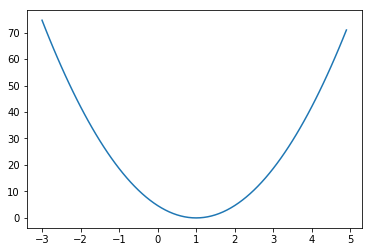

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]


W = tf.placeholder("float32")

# linear model X * W 
hypothesis  = W * X

#cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()
#initializes global variables in the graph 
sess.run(tf.global_variables_initializer())
#Variables for plotting cost function 
W_val = []
cost_val = []

for  i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W  = sess.run([cost, W], feed_dict = {W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    #print(curr_cost,curr_W)
    
plt.plot(W_val, cost_val)
plt.show



<hr/>
## Gradient descent

\\( cost(W) = \frac{1}{m}\sum_{i=1}^{m} (Wx^i - y^i)^2 \\)

\\( W := W- \alpha* \frac{1}{m}\sum_{i=1}^{m} (Wx^i - y^i)*x^i \\)

<hr/>
### to code 
##### minimize : gradient descent using derivative 
##### w = w- learning_rate * derivative 


\\(\alpha = learning\_rate\\)

\\(gradient = \frac{1}{m}\sum_{i=1}^{m} (Wx^i - y^i)*x^i \\)

\\(descent = W - leanring\_rate * gradient\\)

\\(update = W.assign(descent)\\)

0 5.099462 [-0.04534292]
1 1.4505135 [0.4424838]
2 0.41259047 [0.70265806]
3 0.117359035 [0.8414177]
4 0.033382103 [0.9154228]
5 0.009495348 [0.95489216]
6 0.0027009028 [0.9759425]
7 0.0007682541 [0.9871693]
8 0.00021852549 [0.99315697]
9 6.215691e-05 [0.9963504]
10 1.7680435e-05 [0.99805355]
11 5.0294952e-06 [0.99896187]
12 1.4306221e-06 [0.99944633]
13 4.0696227e-07 [0.9997047]
14 1.1576399e-07 [0.9998425]
15 3.2924643e-08 [0.999916]
16 9.345424e-09 [0.99995524]
17 2.6688234e-09 [0.9999761]
18 7.5623063e-10 [0.99998724]
19 2.1708975e-10 [0.9999932]
20 6.2126304e-11 [0.99999636]


<function matplotlib.pyplot.show>

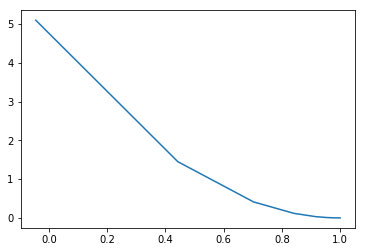

In [29]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
Y = tf.placeholder("float32")
X = tf.placeholder("float32")

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#minimize using gradient descent as manually 
learning_rate =0.1
gradient = tf.reduce_mean(( W * X - Y ) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_list = []
cost_list = []

for step in range(21):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost,feed_dict={X:x_data, Y:y_data}),sess.run(W))
    W_list.append(sess.run(W))
    cost_list.append(sess.run(cost,feed_dict={X:x_data, Y:y_data}))
    
plt.plot(W_list,cost_list)
plt.show

<hr/>
## Optional : compute_gradient and apply_gradient 

### compare manual with auto 

In [68]:
X = [1,2,3]
Y = [1,2,3]
W = tf.Variable(5.0)
hypothesis = W * X

#manual gradient 
gradient = tf.reduce_mean((W * X - Y) * X) * 2
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

#get gradients 
gvs = optimizer.compute_gradients(cost,W)
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("step  gradient       gvs      W\n")
for step in range(100):
    print(step, sess.run([gradient]),sess.run([gvs]))
    sess.run(apply_gradients)

step  gradient       gvs      W

0 [37.333332] [[(37.333336, 5.0)]]
1 [33.84889] [[(33.84889, 4.6266665)]]
2 [30.689657] [[(30.689657, 4.2881775)]]
3 [27.825287] [[(27.825287, 3.9812808)]]
4 [25.228262] [[(25.228264, 3.703028)]]
5 [22.873621] [[(22.873623, 3.4507453)]]
6 [20.738752] [[(20.738752, 3.2220092)]]
7 [18.803137] [[(18.803137, 3.0146217)]]
8 [17.048176] [[(17.048176, 2.8265903)]]
9 [15.457013] [[(15.457014, 2.6561086)]]
10 [14.014359] [[(14.01436, 2.5015385)]]
11 [12.706352] [[(12.706352, 2.361395)]]
12 [11.520427] [[(11.520427, 2.2343314)]]
13 [10.445186] [[(10.445186, 2.119127)]]
14 [9.470302] [[(9.470302, 2.0146751)]]
15 [8.586407] [[(8.586407, 1.9199722)]]
16 [7.785009] [[(7.785009, 1.8341081)]]
17 [7.0584083] [[(7.0584083, 1.756258)]]
18 [6.399624] [[(6.399624, 1.685674)]]
19 [5.8023257] [[(5.8023257, 1.6216778)]]
20 [5.260776] [[(5.260776, 1.5636545)]]
21 [4.7697697] [[(4.7697697, 1.5110468)]]
22 [4.324591] [[(4.324591, 1.4633491)]]
23 [3.9209633] [[(3.9209635, 1.420103